In [ ]:
!unzip /content/archive.zip -d /content/Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [4]:
paths = []
labels = []
import os
for dirname, _, filenames in os.walk('/content/Dataset'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

        label = filename.split('_')[-1]

        label = label.split('.')[0]
        labels.append(label.lower())

print("Dataset Loaded")

Dataset Loaded


In [5]:
paths[:5]

['/content/Dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_talk_fear.wav',
 '/content/Dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_love_fear.wav',
 '/content/Dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_sail_fear.wav',
 '/content/Dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/content/Dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_ripe_fear.wav']

In [6]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [7]:
df = pd.DataFrame()
df['speech'] = paths
df['label']= labels
df.head()

,speech,label
0,/content/Dataset/tess toronto emotional speech...,fear
1,/content/Dataset/tess toronto emotional speech...,fear
2,/content/Dataset/tess toronto emotional speech...,fear
3,/content/Dataset/tess toronto emotional speech...,fear
4,/content/Dataset/tess toronto emotional speech...,fear


In [8]:
df['label'].value_counts()

,count
label,
fear,800
sad,800
angry,800
disgust,800
ps,800
neutral,800
happy,800


<Axes: xlabel='count', ylabel='label'>

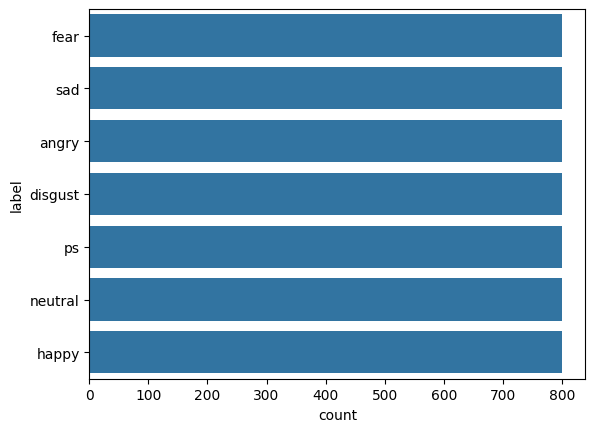

In [9]:
sns.countplot(df['label'])

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size= 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size= 20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')

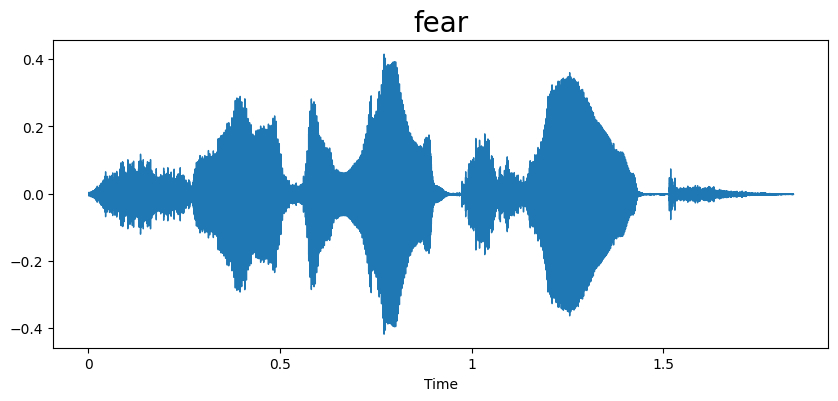

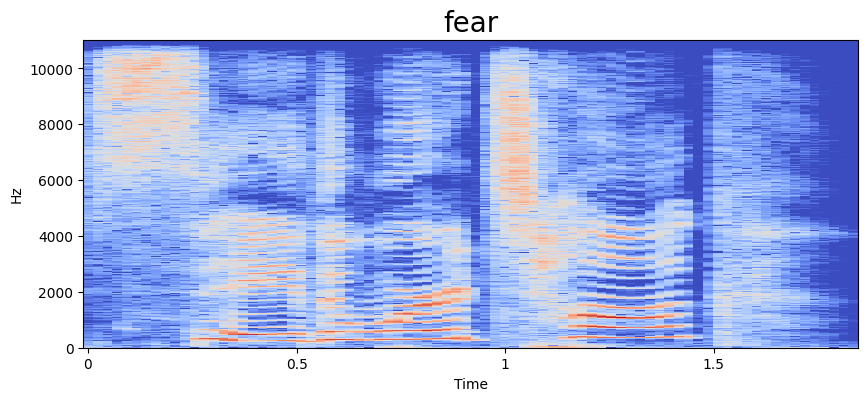

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

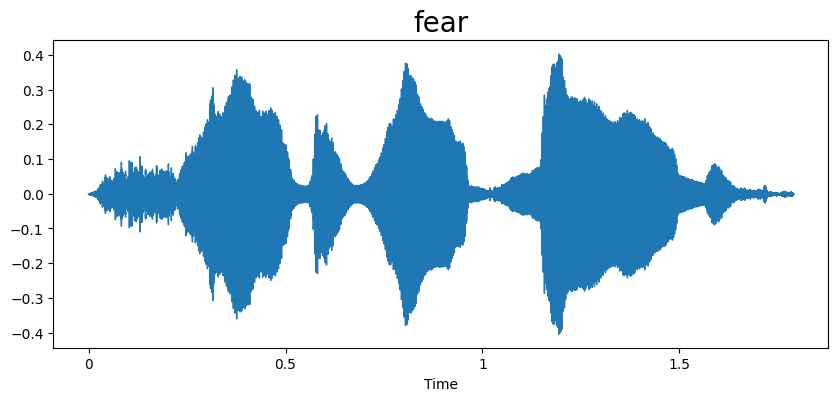

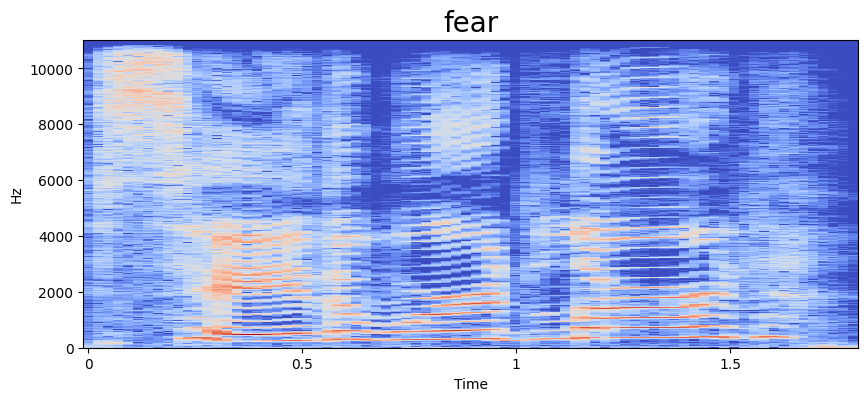

In [12]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[10]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

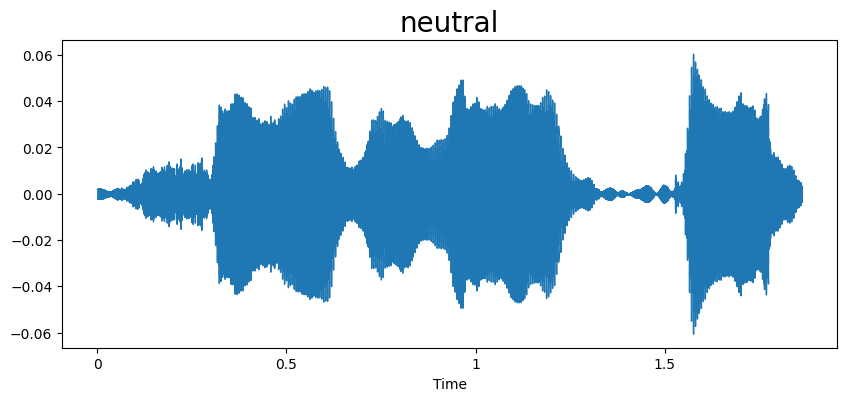

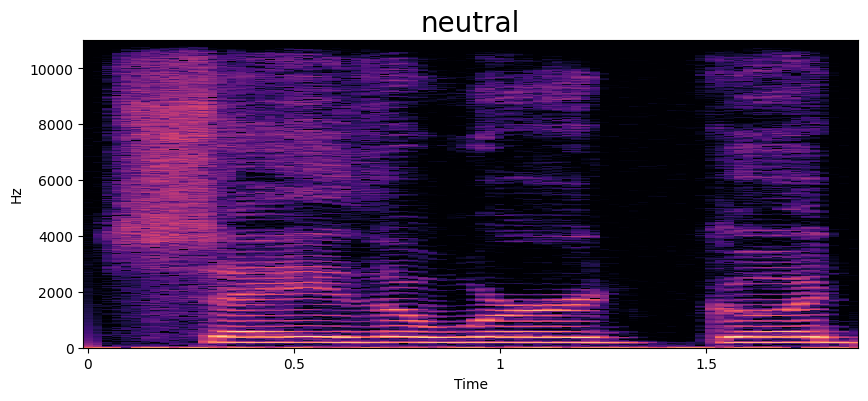

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc=40).T, axis=0)
    return mfcc

In [15]:
extract_mfcc(df['speech'][0])

array([-3.12498474e+02,  4.36959686e+01, -2.71605721e+01,  5.97169924e+00,
       -1.56779442e+01,  9.63903046e+00,  6.44699049e+00, -9.24623013e+00,
       -5.68237638e+00,  1.09704275e+01, -1.63307133e+01,  3.33618927e+00,
       -2.50056553e+00, -1.57206547e+00,  5.88537812e-01, -8.61563873e+00,
       -1.63344359e+00,  1.35026989e+01,  2.00957632e+00,  1.56185017e+01,
        1.00422115e+01,  4.98715115e+00,  3.69724369e+00,  7.54397917e+00,
        5.11223984e+00,  9.74728203e+00, -3.94667602e+00, -4.38370514e+00,
       -3.14480495e+00,  2.52189398e+00, -4.11306190e+00, -5.04625261e-01,
       -7.87302017e+00, -3.59139651e-01,  1.91036195e-01,  4.80829191e+00,
       -2.11391702e-01,  1.45249641e+00,  3.41253567e+00,  2.63681340e+00],
      dtype=float32)

In [16]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [17]:
x_mfcc

,speech
0,"[-312.49847, 43.69597, -27.160572, 5.971699, -..."
1,"[-269.5171, 56.21758, -12.811468, -4.1020637, ..."
2,"[-320.59937, 45.018574, -18.317503, 1.5769436,..."
3,"[-306.63422, 21.259708, -4.4110823, 6.487155, ..."
4,"[-338.25797, 66.80307, -30.96228, 9.010918, -4..."
...,...
5595,"[-445.83224, 90.611374, 28.109, -14.74382, 11...."
5596,"[-434.06976, 111.498955, 41.991444, -5.9684324..."
5597,"[-422.197, 120.919556, 1.664786, -17.938852, 9..."
5598,"[-430.7277, 109.6817, 17.197834, -12.594558, 1..."


In [18]:
X= [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [19]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [21]:
y =y.toarray()

In [22]:
y.shape

(5600, 7)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),

])

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#train the model
history=model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle = True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.2124 - loss: 1.8963 - val_accuracy: 0.3536 - val_loss: 1.8094
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4392 - loss: 1.6333 - val_accuracy: 0.3991 - val_loss: 1.6297
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5865 - loss: 1.2558 - val_accuracy: 0.3759 - val_loss: 1.3416
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6434 - loss: 0.9421 - val_accuracy: 0.4866 - val_loss: 1.0176
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7208 - loss: 0.7374 - val_accuracy: 0.5982 - val_loss: 0.8758
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8260 - loss: 0.5404 - val_accuracy: 0.7330 - val_loss: 0.5760
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8796 - loss: 0.3862 - val_accuracy: 0.8152 - val_loss: 0.4229
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8999 - loss: 0.3110 - val_accuracy: 0.8491 - val_loss:

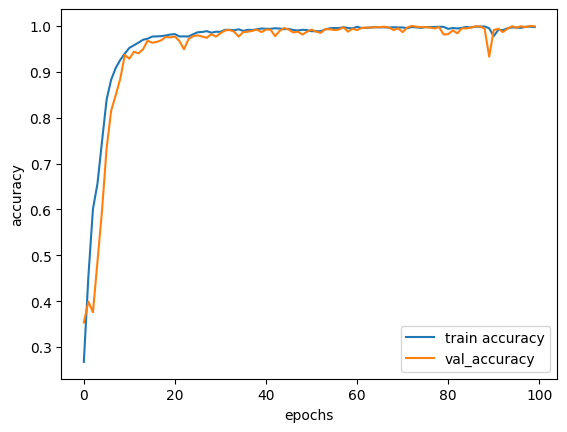

In [25]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

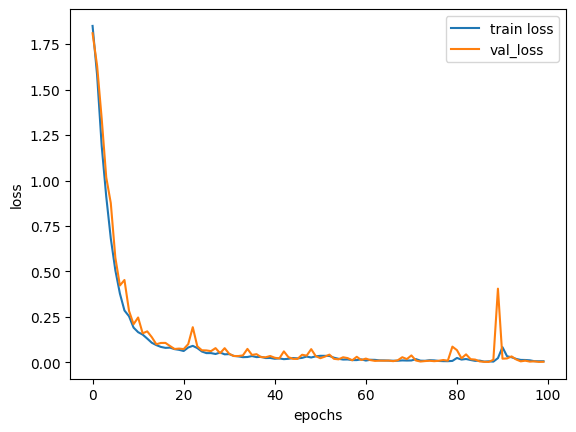

In [26]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
# prompt: download the model

model.save('my_model.h5')
from google.colab import files
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>